In [10]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
#warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

import pickle

In [11]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#############################################################################################
stop_words.extend(['from', 'also', 'would', 'say', 'percent', 'year', 'mention', 'make_sure', 'enough',
                   'yet', 'next', 'instead', 'perhaps', 'purely', 'thompson', 'matthew', 'charle', 'october',
                   'onetime',  'olivia', 'come', 'mike',  'martin',  'poorly', 'rainy_day',  'way', 'many',
                   'often', 'make', 'give',  'use',   'may', 'great', 'well', 'take', 'see', 'provide',
                   'time', 'example', 'good', 'feel', 'large', 'mark', 'include', 'sai', 'lalao', 'coffee', 'usaid',
                   'become', 'get', 'high', 'stay', 'day', 'cut', 'increase', 'even', 'number', 'organization',
                   'process', 'result', 'affiliate',  'offer', 'ict', 'white', 'jackson', 'susan', 'go', 'first', 'second'])

### Load LDA model and data

In [12]:
with open("savecorpus.pkl", "rb") as f:
    corpus = pickle.load(f)
with open("data_lemmatized.pkl", "rb") as f:
    data_lemmatized = pickle.load(f)
with open("id2word.pkl", "rb") as f:
    id2word = pickle.load(f)

lda_model =  gensim.models.LdaModel.load('lda.model')

In [13]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.013*"foundation" + 0.006*"support" + 0.006*"public" + 0.006*"people" + '
  '0.006*"social" + 0.005*"work" + 0.004*"new" + 0.004*"science" + '
  '0.004*"community" + 0.004*"change"'),
 (1,
  '0.014*"nonprofit" + 0.010*"program" + 0.006*"change" + 0.006*"service" + '
  '0.006*"work" + 0.005*"network" + 0.005*"need" + 0.005*"social" + '
  '0.005*"new" + 0.005*"impact"'),
 (2,
  '0.011*"company" + 0.007*"brand" + 0.007*"change" + 0.007*"social" + '
  '0.006*"business" + 0.005*"issue" + 0.004*"strategy" + 0.004*"corporate" + '
  '0.004*"merger" + 0.004*"work"'),
 (3,
  '0.006*"business" + 0.006*"people" + 0.006*"poor" + 0.005*"loan" + '
  '0.005*"social" + 0.005*"microfinance" + 0.005*"service" + 0.004*"education" '
  '+ 0.004*"program" + 0.004*"engo"'),
 (4,
  '0.010*"work" + 0.008*"people" + 0.004*"new" + 0.004*"group" + '
  '0.004*"foundation" + 0.004*"team" + 0.004*"help" + 0.004*"community" + '
  '0.003*"grantee" + 0.003*"need"'),
 (5,
  '0.009*"people" + 0.006*"nonprofit" + 

In [5]:
# Compute Perplexity
# a measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.152091113725355

Coherence Score:  0.3187229341347545


###  pyLDAvis

In [5]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

E:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.032191  0.043419       1        1  25.586432
8     -0.040025  0.016907       2        1  13.101440
2     -0.004989 -0.077218       3        1  11.716019
4      0.039599  0.007497       4        1  10.860132
9     -0.006878  0.011803       5        1   9.544430
3     -0.064591  0.022280       6        1   7.213535
5      0.067490  0.021804       7        1   7.031203
0      0.024010 -0.051523       8        1   5.140953
6     -0.023376  0.010278       9        1   5.065219
7     -0.023431 -0.005246      10        1   4.740641, topic_info=      Category         Freq          Term        Total  loglift  logprob
350    Default  1910.000000    foundation  1910.000000  30.0000  30.0000
1015   Default  1862.000000       company  1862.000000  29.0000  29.0000
440    Default  1026.000000    innovation  1026.000000  28.0000  28.0000
603    Default  2568.000000        people  2568.000000  27.0000  27.0000
963    Default   553.000000         brand   553.000000  26.0000  26.0000
282    Default   249.000000     endowment   249.000000  25.0000  25.0000
456    Default   552.000000      investor   552.000000  24.0000  24.0000
2749   Default   398.000000          loan   398.000000  23.0000  23.0000
6402   Default   362.000000        merger   362.000000  22.0000  22.0000
455    Default   918.000000    investment   918.000000  21.0000  21.0000
3594   Default   529.000000         woman   529.000000  20.0000  20.0000
2001   Default   624.000000          poor   624.000000  19.0000  19.0000
111    Default  1931.000000      business  1931.000000  18.0000  18.0000
752    Default  2888.000000        social  2888.000000  17.0000  17.0000
3006   Default   228.000000  microfinance   228.000000  16.0000  16.0000
381    Default  1300.000000    government  1300.000000  15.0000  15.0000
22519  Default   149.000000          engo   149.000000  14.0000  14.0000
359    Default  1284.000000          fund  1284.000000  13.0000  13.0000
1300   Default  2999.000000     nonprofit  2999.000000  12.0000  12.0000
5914   Default   234.000000           tax   234.000000  11.0000  11.0000
898    Default  2391.000000          work  2391.000000  10.0000  10.0000
8028   Default   143.000000          mfis   143.000000   9.0000   9.0000
1259   Default  1150.000000        market  1150.000000   8.0000   8.0000
666    Default  1265.000000        public  1265.000000   7.0000   7.0000
800    Default  1504.000000       support  1504.000000   6.0000   6.0000
267    Default   661.000000      economic   661.000000   5.0000   5.0000
1614   Default   551.000000       capital   551.000000   4.0000   4.0000
627    Default   384.000000     political   384.000000   3.0000   3.0000
78     Default   281.000000          bank   281.000000   2.0000   2.0000
1476   Default   349.000000       teacher   349.000000   1.0000   1.0000
...        ...          ...           ...          ...      ...      ...
267    Topic10    95.598480      economic   661.025635   1.1154  -5.4736
1211   Topic10    86.243309   information   617.045654   1.0812  -5.5766
1176   Topic10    74.433235        growth   481.482574   1.1820  -5.7239
554    Topic10    39.019676        nation   169.738556   1.5788  -6.3697
603    Topic10   159.905319        people  2568.553467   0.2725  -4.9592
2001   Topic10    75.062515          poor   624.922546   0.9297  -5.7154
2467   Topic10    23.432217         phone    69.606461   1.9603  -6.8796
139    Topic10    67.039879          city   639.128052   0.7942  -5.8285
202    Topic10    64.897697       country   615.269287   0.7997  -5.8609
381    Topic10    87.498016    government  1300.730347   0.3499  -5.5621
734    Topic10    88.090500       service  1687.056763   0.0966  -5.5554
500    Topic10    48.010082          live   389.500549   0.9555  -6.1623
566    Topic10    92.875549           new  2012.917969  -0.0271  -5.5025
207    Topic10    83.103

In [6]:
#save pyLDAvis image
#pyLDAvis.save_html(vis,'lda.html')

### What is the Dominant topic and its percentage contribution in each document.

In [6]:
data=[]
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.9501,"nonprofit, program, change, service, work, net...","[big, deal, conservation, larry, linden, steve..."
1,1,1.0,0.7506,"nonprofit, program, change, service, work, net...","[john_kania, kramer, winter, university, leade..."
2,2,9.0,0.9750,"innovation, social, people, new, work, program...","[create, social, value, philip, auerswald, spr..."
3,3,4.0,0.9996,"work, people, new, group, foundation, team, he...","[luck, draw, kevin, bolduc, phil_buchanan, ell..."
4,4,8.0,0.4822,"social, foundation, company, business, nonprof...","[partnership, learn, manage, tension, nonprofi..."
5,5,1.0,0.5564,"nonprofit, program, change, service, work, net...","[reshape, social, paul, light, fall, leland_st..."
6,6,7.0,0.6366,"people, datum, economic, new, service, governm...","[social, case, definition, roger, sally_osberg..."
7,7,4.0,0.8666,"work, people, new, group, foundation, team, he...","[spark, nonprofit, innovation, weird, manageme..."
8,8,1.0,0.7483,"nonprofit, program, change, service, work, net...","[dawn, system, leadership, peter_senge, hamilt..."
9,9,7.0,0.9997,"people, datum, economic, new, service, governm...","[hide, cost, paradise, displace, create, wilde..."


In [ ]:
#save data to excel
#df_dominant_topic.to_excel('dominant_topic.xlsx')

### The most representative sentence for each topic

In [10]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9863,"foundation, support, public, people, social, work, new, science, community, change","[war, idea, mainstream, think_tank, support, lose, war, idea, andrew, rich, leland_stanford, jr_..."
1,1.0,0.9998,"nonprofit, program, change, service, work, network, need, social, new, impact","[feature, design_think, clark, gilbert, michael, crow, derrick, anderson, winter, ncopyright, wi..."
2,2.0,0.9998,"company, brand, change, social, business, issue, strategy, corporate, merger, work","[head, head, company, activist, square, sometimes, win, david, baron, leland_stanford, jr_univer..."
3,3.0,0.9998,"business, people, poor, loan, social, microfinance, service, education, program, engo","[microfinance, client, must, srikant, datar, marc, epstein, kristi, yuthas, winter, leland_stanf..."
4,4.0,0.9998,"work, people, new, group, foundation, team, help, community, grantee, need","[act, fact, faith, management, follow, medicine, lead, rely, evidence, half_truth, jeffrey, pfef..."
5,5.0,0.9823,"people, nonprofit, government, work, need, founder, program, service, funder, foundation","[nonprofit, really_big, gail, fine, spring, leland_stanford, jr_university, rights_reserv, gail,..."
6,6.0,0.9998,"endowment, woman, tax, fund, social, new, change, people, foundation, business","[feature, risky, rhetoric, female_risk, aversion, sarah_kaplan, natassia, walley, leland_stanfor..."
7,7.0,0.9997,"people, datum, economic, new, service, government, work, information, create, business","[hide, cost, paradise, displace, create, wilderness, area, detriment, dowie, spring, leland_stan..."
8,8.0,0.9998,"social, foundation, company, business, nonprofit, investment, investor, market, fund, grant","[money, meet, mission, break, firewall, foundation, investment, programming, jed_emerson, summer..."
9,9.0,0.9998,"innovation, social, people, new, work, program, teacher, school, problem, create","[feature, economic, force, conserve, nature, reid, aaron, bruner, alfonso, malky, leland_stanfor..."


### Frequency Distribution of Word Counts in Documents

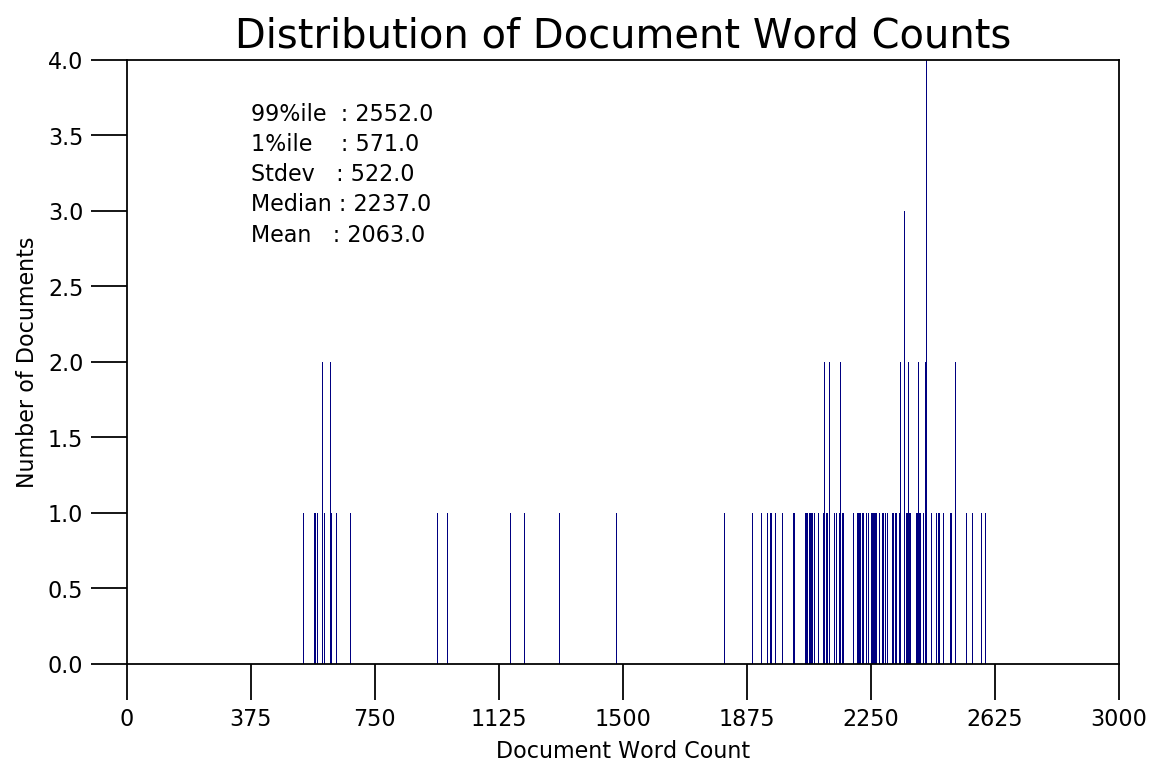

In [11]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(8,5), dpi=160)
plt.hist(doc_lens,bins=1500, color='navy')
plt.text(375, 2.8, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(375, 3.0, "Median : " + str(round(np.median(doc_lens))))
plt.text(375, 3.2, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(375, 3.4, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(375, 3.6, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 3000),ylim=(0,4), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,3000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=18))
plt.show()

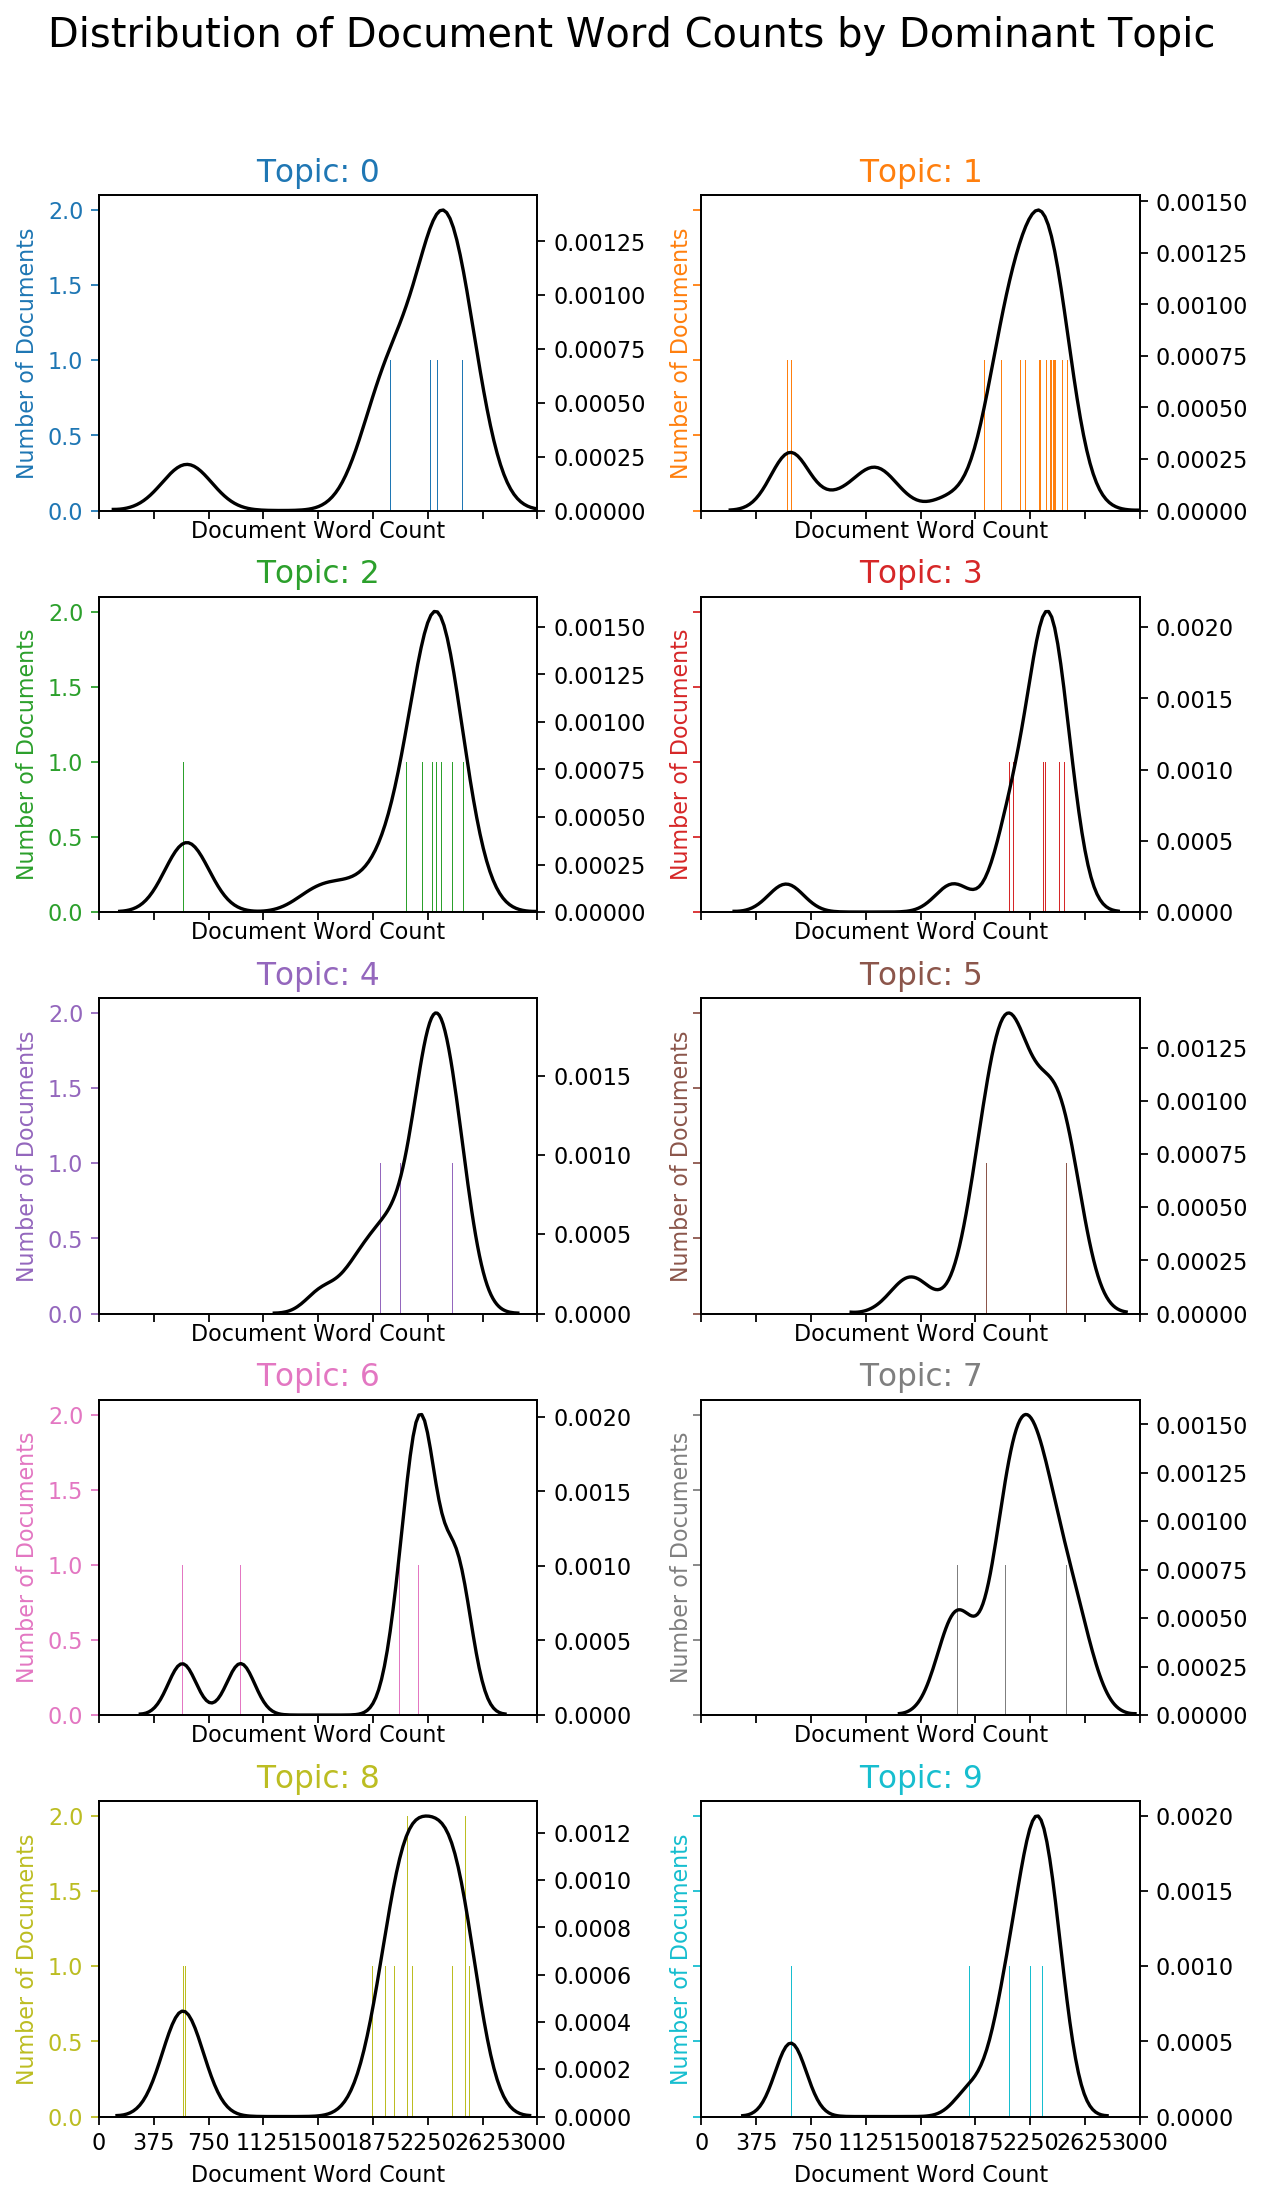

In [12]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(5,2,figsize=(8,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 3000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=14, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,3000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=18)
plt.show()

### Word Clouds of Top N Keywords in Each Topic

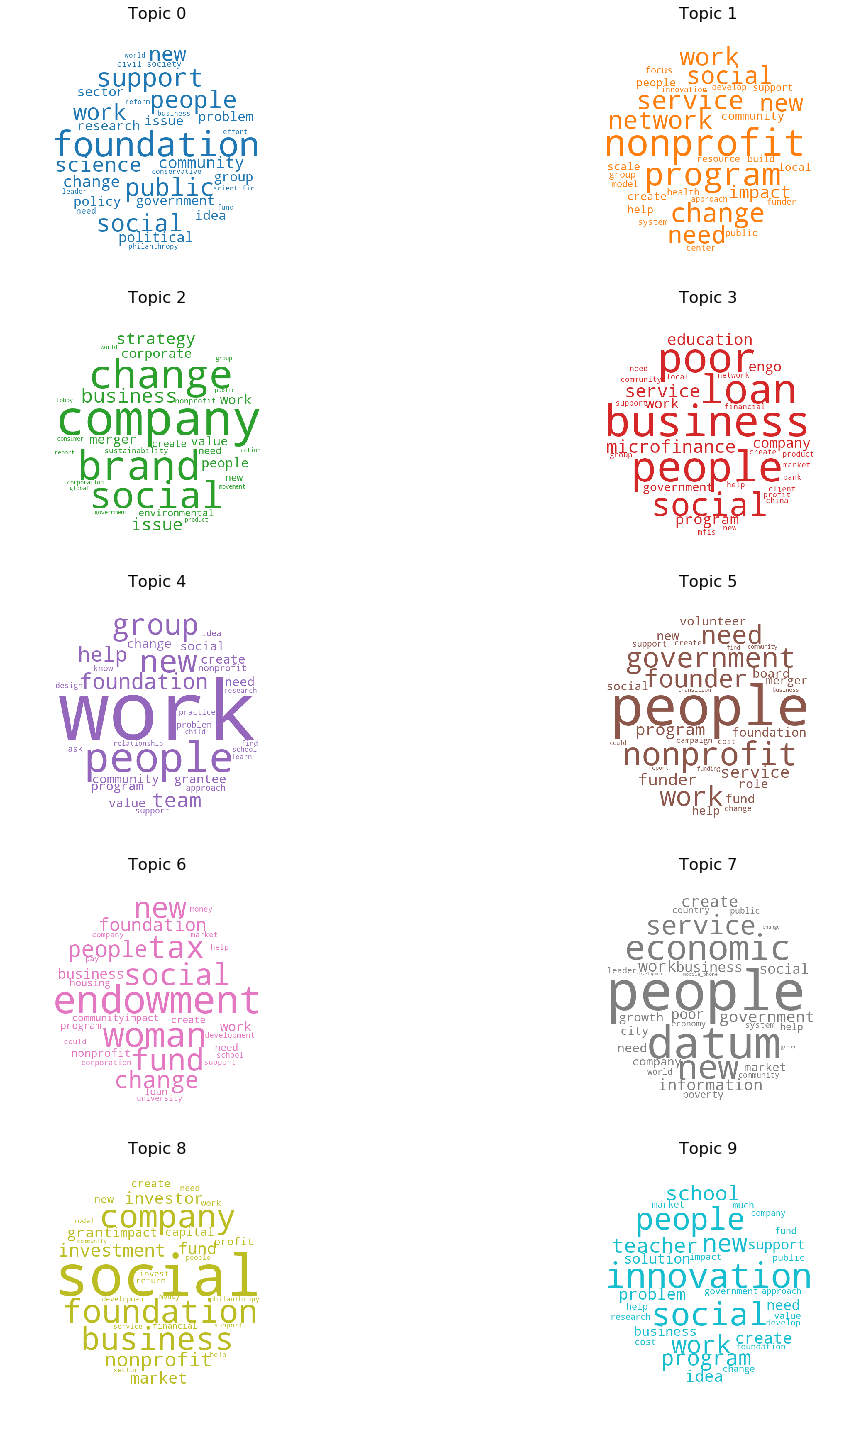

In [18]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# more colors: 'mcolors.XKCD_COLORS'
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                 # width=3000,
                  #height=2000,
                  max_words=500,
                  mask=mask,
                  colormap='tab15',
                  max_font_size=16,
                  min_font_size=3,
                  scale=2,
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(num_words=30, formatted=False)
# print(topics)

fig, axes = plt.subplots(5, 2, figsize=(20, 20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Word Counts of Topic Keywords

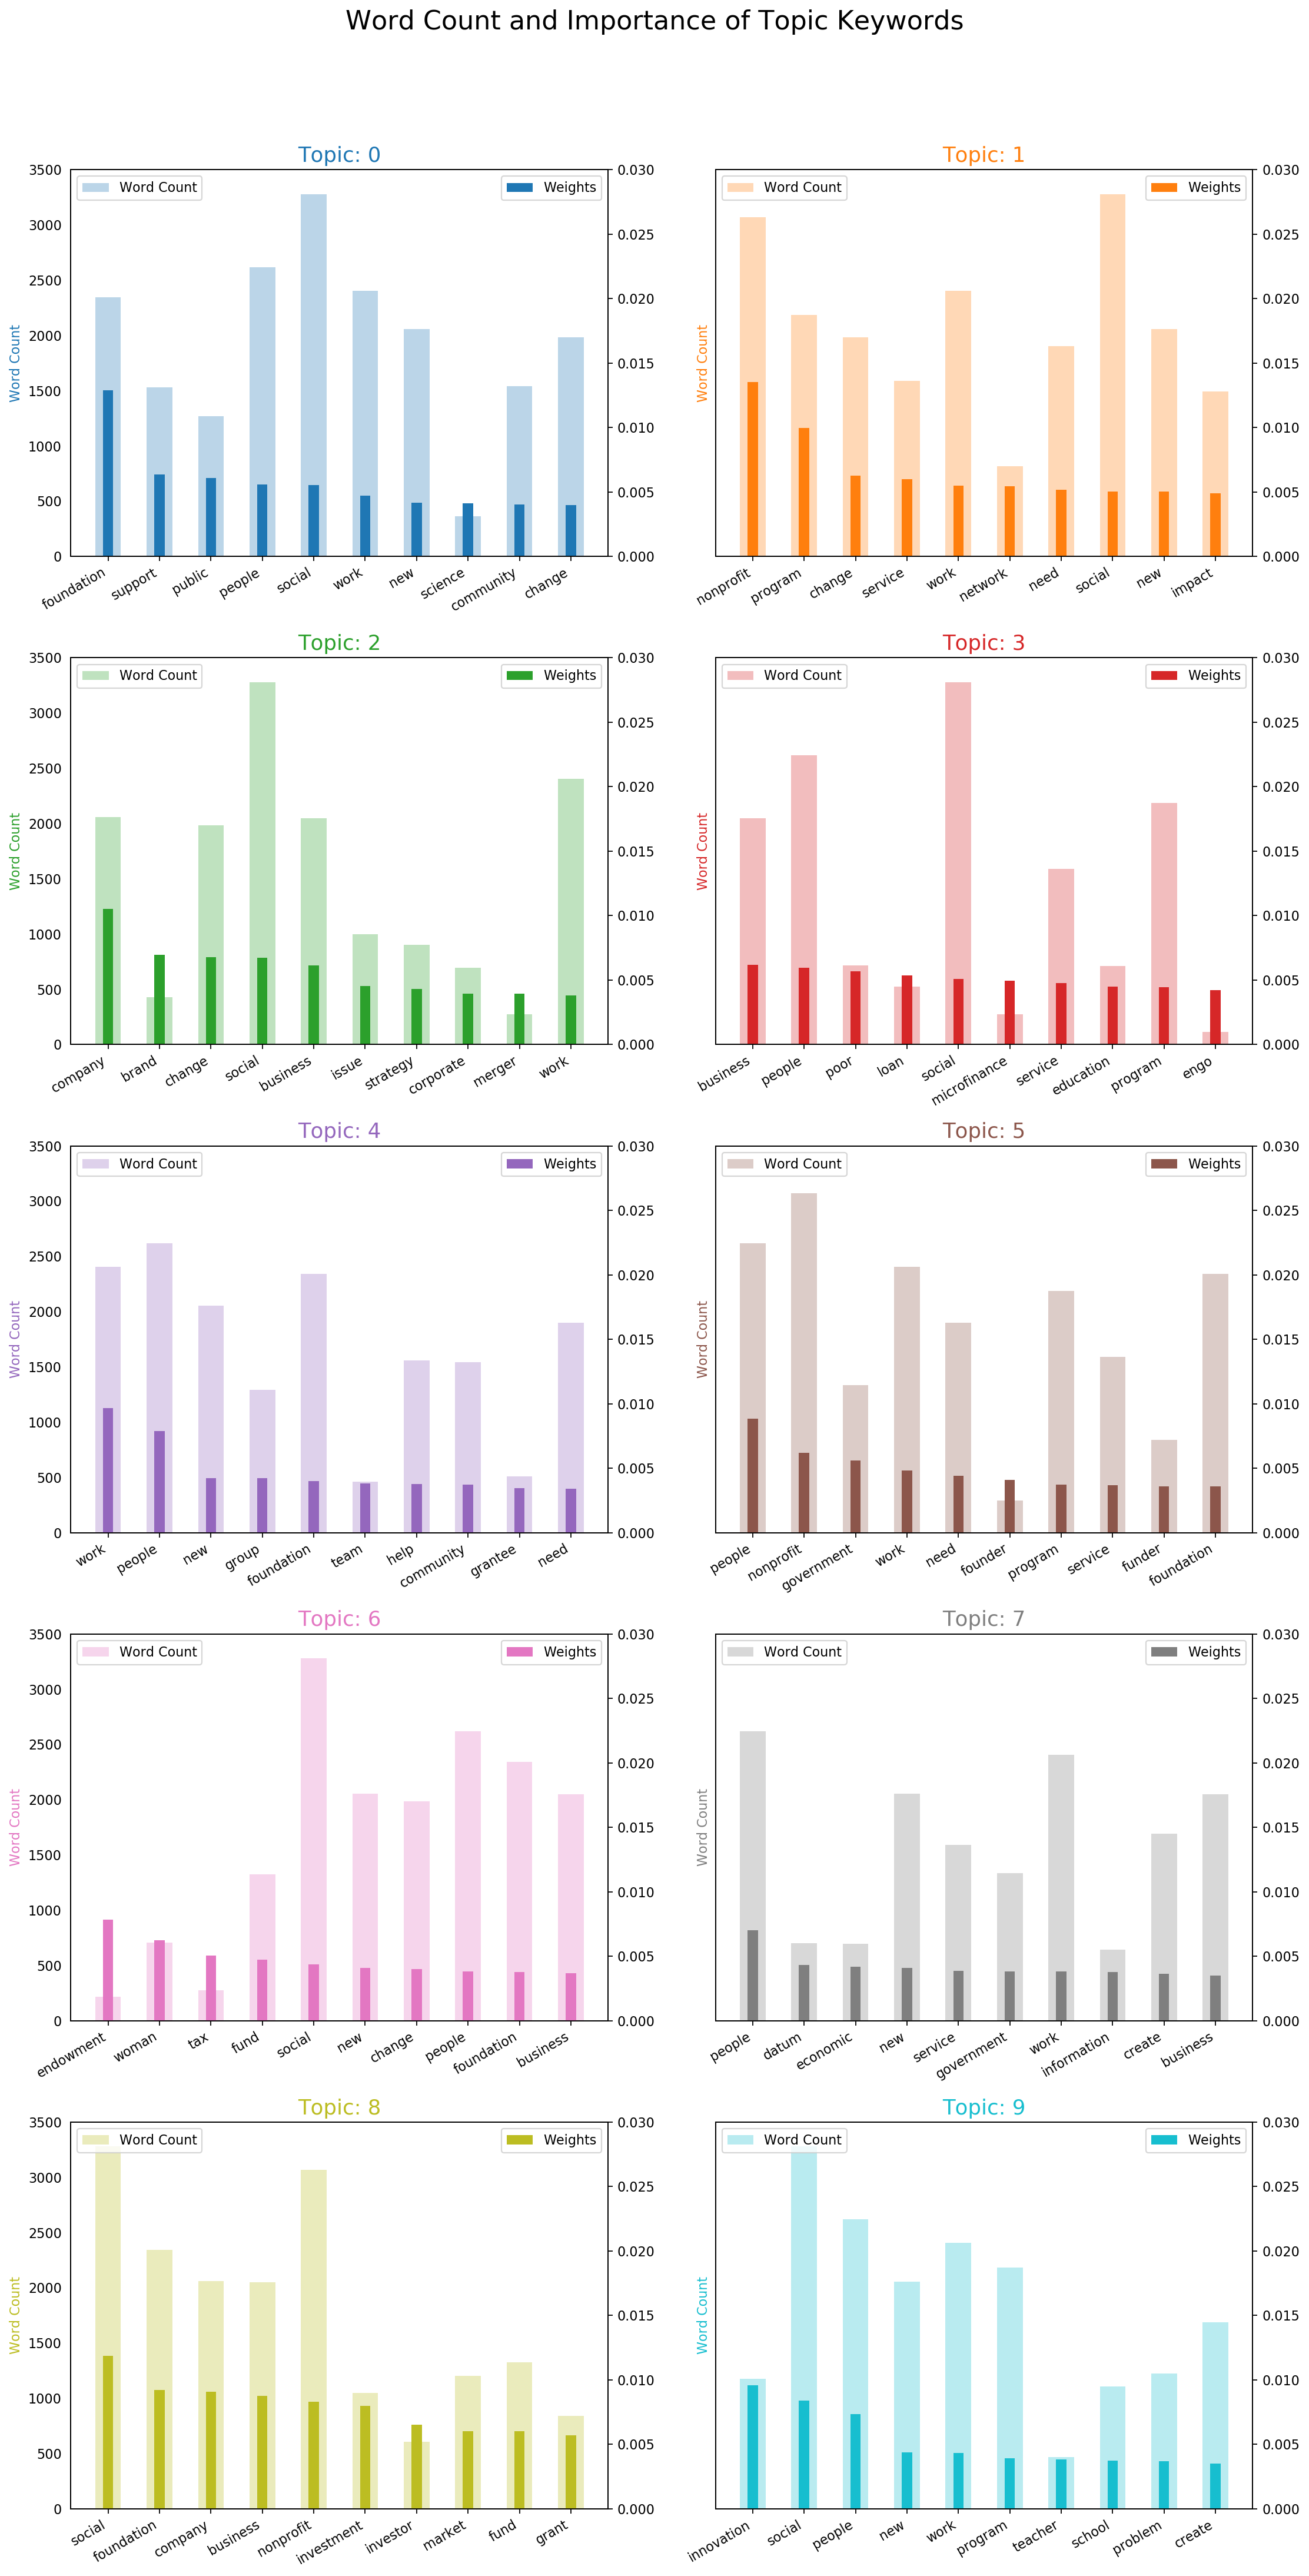

In [17]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_lemmatized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(14,26), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=20, y=1.05)    
plt.show()

### What are the most discussed topics in the documents?

In [18]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

#### Plot 1: The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
#### Plot 2: The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents.

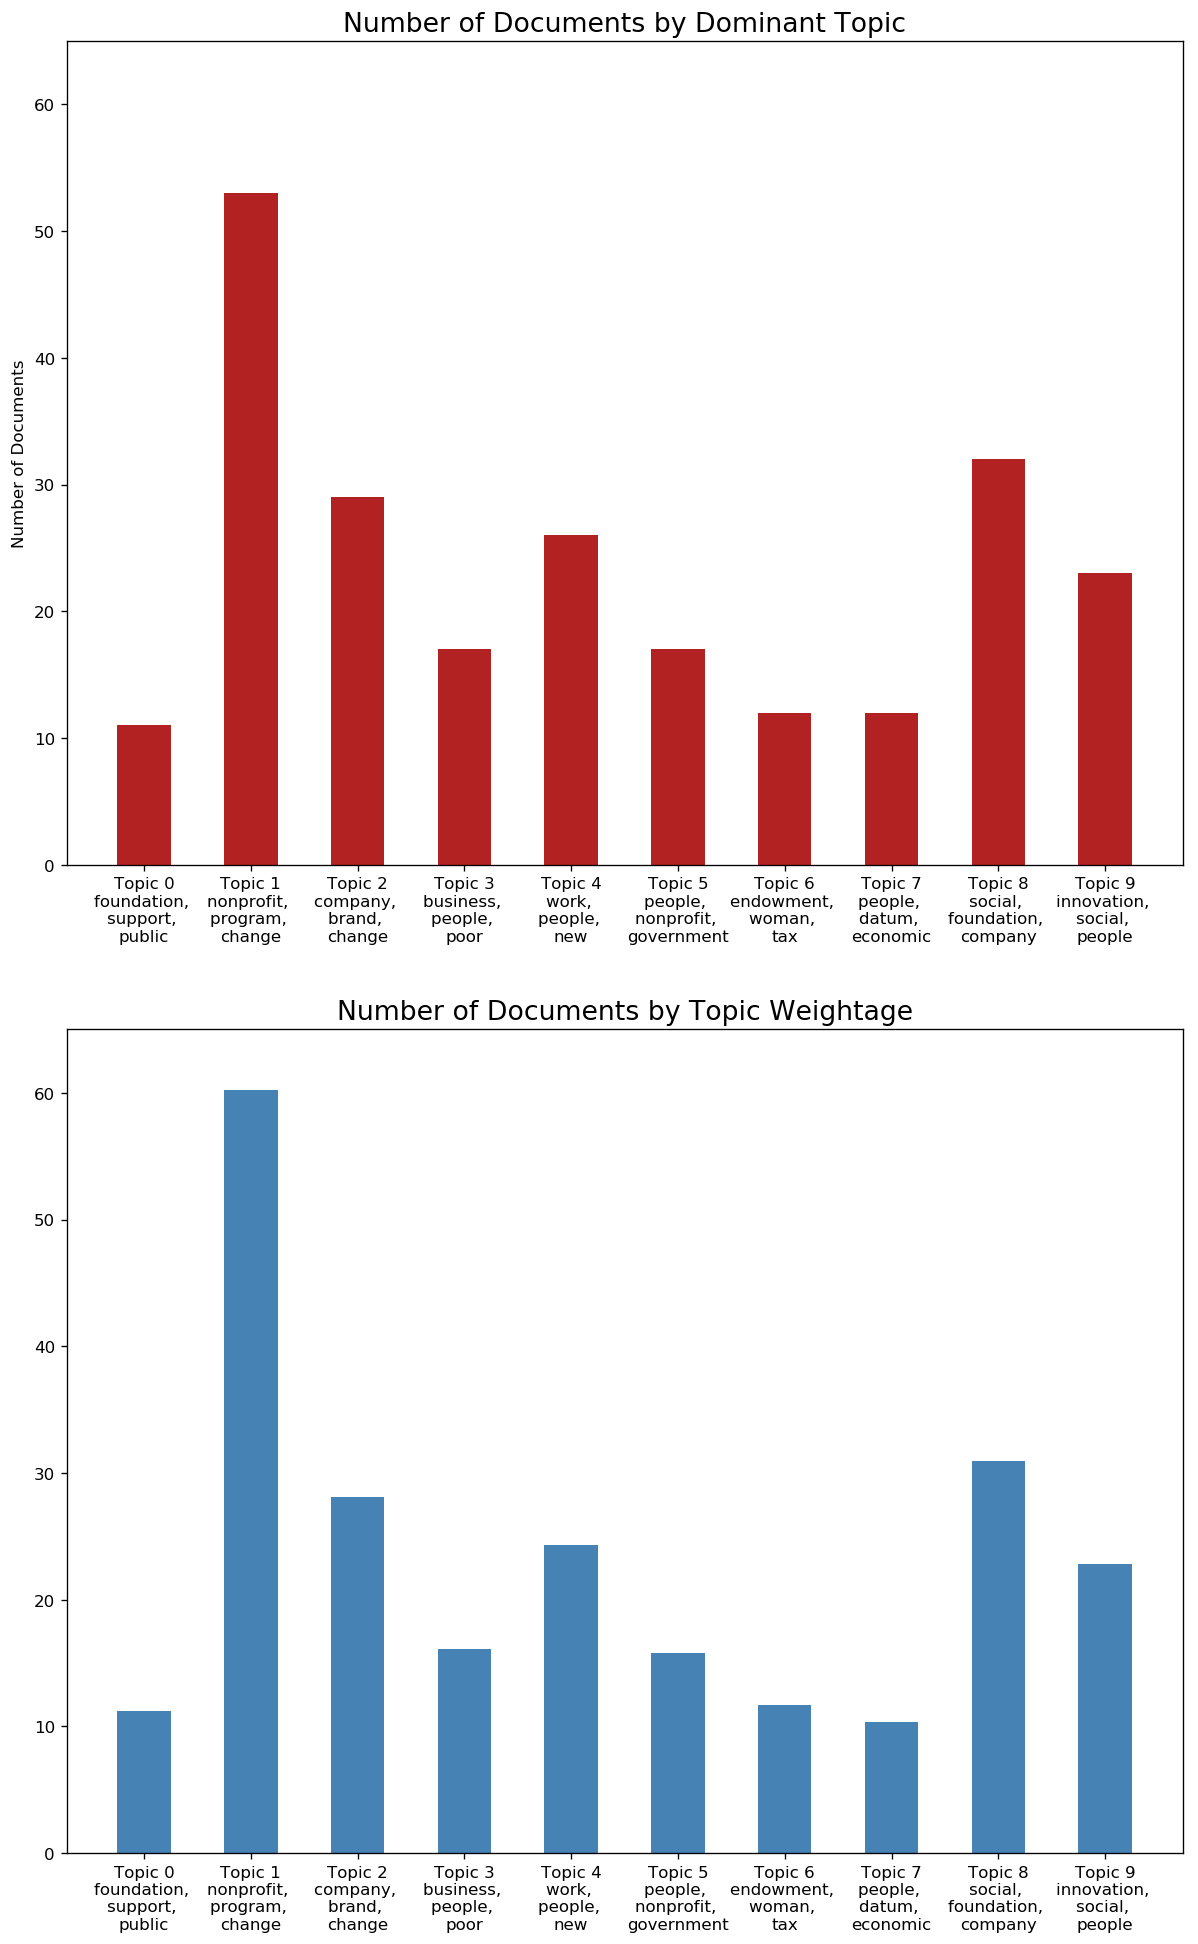

In [19]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 20), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=16))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 65)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=16))

plt.show()

### t-SNE Clustering Chart

In [44]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

#print(topic_weights)

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values
#print(arr)

# Dominant topic number in each doc
testarr = df_dominant_topic['Dominant_Topic']
testarr = np.array(testarr, dtype=pd.Series)
testarr = testarr.astype(np.int64)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=0.99, init='pca',n_iter=1000)
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 10
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics))
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[testarr])
show(plot)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 233 samples in 0.000s...
[t-SNE] Computed neighbors for 233 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 233 / 233
[t-SNE] Mean sigma: 0.001869
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.576153
[t-SNE] KL divergence after 950 iterations: 0.152694


Loading BokehJS ...

In [51]:
for i in range(10):
    output_notebook()
    n_topics = i
    mycolors = np.array(['#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e',
                         '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e'], dtype='<U7')
    mycolors[i] = '#1f77b4'
    plot = figure(title="t-SNE Clustering of LDA Topic {} ".format(n_topics))
    plot.scatter(x=tsne_lda[:, 0], y=tsne_lda[:, 1], color=mycolors[testarr])
    show(plot)

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...